In [1]:
import os
import tensorflow as tf
import numpy as np

In [2]:
new_saved = ["milk", "coffee", "door", "dog"]

In [3]:
# Function for processing data
def process_train_data(X, y, directory, new_saved):
    for label in new_saved:
        print(label)
        dir = os.path.join(directory, label)
        for file in os.listdir(dir):
            arr = np.load(os.path.join(directory, label, file))
            
            for frame in arr:
                if len(X) == 0:
                    X = np.array([frame])
                    y = np.array([new_saved.index(label)])
                else:
                    X = np.append(X, np.array([frame]), axis=0)
                    y = np.append(y, np.array([new_saved.index(label)]), axis=0)
            

    print(X.shape, y.shape)
    return (X, y)

In [4]:
# Function for processing data
def process_val_data(X_val,y_val, X_test, y_test, directory, new_saved):
    val = False
    for label in new_saved:
        print(label)
        dir = os.path.join(directory, label)
        for file in os.listdir(dir):
            val = not(val)
            print(val)
            arr = np.load(os.path.join(directory, label, file))
            if val:
                for frame in arr:
                    if len(X_val) == 0:
                        X_val = np.array([frame])
                        y_val = np.array([new_saved.index(label)])
                    else:
                        X_val = np.append(X_val, np.array([frame]), axis=0)
                        y_val = np.append(y_val, np.array([new_saved.index(label)]), axis=0)
            else:
                for frame in arr:
                    if len(X_test) == 0:
                        X_test = np.array([frame])
                        y_test = np.array([new_saved.index(label)])
                    else:
                        X_test = np.append(X_test, np.array([frame]), axis=0)
                        y_test = np.append(y_test, np.array([new_saved.index(label)]), axis=0)

    print(X_val.shape, y_val.shape, X_test.shape, y_test.shape)
    return (X_val, y_val, X_test, y_test)

In [5]:
import time

start = time.time()
train_dir = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/four_var/four_var_training_data"
X_train = np.array([])
y_train = np.array([])
X_train, y_train = process_train_data(X_train, y_train, train_dir, new_saved)
end = time.time()
delta = end - start
print("TIME: ", delta)

milk
coffee
door
dog
(2484, 256, 256, 3) (2484,)
TIME:  1440.4448881149292


In [6]:
val_dir = "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/four_var/four_var_validation_data"
X_val = np.array([])
y_val = np.array([])
X_test = np.array([])
y_test = np.array([])
X_val, y_val, X_test, y_test = process_val_data(X_val, y_val, X_test, y_test, val_dir, new_saved)

milk
True
False
True
False
True
False
True
coffee
False
True
False
True
False
True
door
False
True
False
True
dog
False
True
False
True
False
(299, 256, 256, 3) (299,) (297, 256, 256, 3) (297,)


In [7]:
#shuffle train data
import sklearn
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_train, y_train

(array([[[[ 0.6156863 ,  0.6156863 ,  0.6156863 ],
          [ 0.60784316,  0.60784316,  0.60784316],
          [ 0.60784316,  0.60784316,  0.60784316],
          ...,
          [-0.46666667, -0.46666667, -0.46666667],
          [-0.4745098 , -0.4745098 , -0.4745098 ],
          [-0.4745098 , -0.4745098 , -0.4745098 ]],
 
         [[ 0.6156863 ,  0.6156863 ,  0.6156863 ],
          [ 0.6156863 ,  0.6156863 ,  0.6156863 ],
          [ 0.6156863 ,  0.6156863 ,  0.6156863 ],
          ...,
          [-0.46666667, -0.46666667, -0.46666667],
          [-0.4745098 , -0.4745098 , -0.4745098 ],
          [-0.4745098 , -0.4745098 , -0.4745098 ]],
 
         [[ 0.6156863 ,  0.6156863 ,  0.6156863 ],
          [ 0.6156863 ,  0.6156863 ,  0.6156863 ],
          [ 0.6156863 ,  0.6156863 ,  0.6156863 ],
          ...,
          [-0.46666667, -0.46666667, -0.46666667],
          [-0.4745098 , -0.4745098 , -0.4745098 ],
          [-0.4745098 , -0.4745098 , -0.4745098 ]],
 
         ...,
 
         [[-

In [8]:
#shuffle val and test data
import sklearn
from sklearn.utils import shuffle
X_val, y_val = shuffle(X_val, y_val, random_state=42)

X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_test, y_test

(array([[[[ 0.64705884,  0.88235295,  0.88235295],
          [ 0.64705884,  0.88235295,  0.88235295],
          [ 0.64705884,  0.88235295,  0.88235295],
          ...,
          [ 0.35686275,  0.52156866,  0.5137255 ],
          [ 0.3254902 ,  0.5058824 ,  0.49803922],
          [ 0.3254902 ,  0.5058824 ,  0.49803922]],
 
         [[ 0.64705884,  0.88235295,  0.88235295],
          [ 0.64705884,  0.88235295,  0.88235295],
          [ 0.64705884,  0.88235295,  0.88235295],
          ...,
          [ 0.35686275,  0.52156866,  0.5137255 ],
          [ 0.3254902 ,  0.5058824 ,  0.49803922],
          [ 0.3254902 ,  0.5058824 ,  0.49803922]],
 
         [[ 0.64705884,  0.88235295,  0.88235295],
          [ 0.64705884,  0.88235295,  0.88235295],
          [ 0.64705884,  0.88235295,  0.88235295],
          ...,
          [ 0.35686275,  0.52156866,  0.5137255 ],
          [ 0.3254902 ,  0.5058824 ,  0.49803922],
          [ 0.3254902 ,  0.5058824 ,  0.49803922]],
 
         ...,
 
         [[ 

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = ResNet50(input_shape=(256, 256,3), include_top=False, weights="imagenet")

base_model = Sequential()
base_model.add(ResNet50(input_shape=(256, 256,3),include_top=False, weights='imagenet', pooling='max'))
for layer in base_model.layers:
    layer.trainable = False
base_model.add(Dense(50, activation='relu'))
base_model.add(Dense(100, activation='relu'))
base_model.add(Dense(4, activation='softmax'))

Metal device set to: Apple M1


2023-02-14 19:59:28.955940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-14 19:59:28.957360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/four_var/four_var_models/ResNet_four_var_weights.{epoch:02d}-{val_accuracy:.2f}",
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
)

In [18]:
base_model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
start = time.time()
resnet_history = base_model.fit(X_train, y_train, validation_data =(X_val, y_val),epochs = 30, batch_size=50, callbacks=[checkpoint])
end = time.time()
deltaTrain = end - start
print("TIME: ", deltaTrain)

2023-02-14 20:06:44.448160: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2023-02-14 20:06:47.089869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 1.6708 - accuracy: 0.5451

2023-02-14 20:08:04.701998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 88s 2s/step - loss: 1.6708 - accuracy: 0.5451 - val_loss: 1.7511 - val_accuracy: 0.1839


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.01-0.18/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.01-0.18/assets


Epoch 2/30
50/50 [==============================] - 78s 2s/step - loss: 0.3565 - accuracy: 0.8812 - val_loss: 1.8675 - val_accuracy: 0.2107


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.02-0.21/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.02-0.21/assets


Epoch 3/30
50/50 [==============================] - 78s 2s/step - loss: 0.1819 - accuracy: 0.9444 - val_loss: 1.4053 - val_accuracy: 0.2609


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.03-0.26/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.03-0.26/assets


Epoch 4/30
50/50 [==============================] - 76s 2s/step - loss: 0.1287 - accuracy: 0.9573 - val_loss: 1.7379 - val_accuracy: 0.2274
Epoch 5/30
50/50 [==============================] - 78s 2s/step - loss: 0.0770 - accuracy: 0.9779 - val_loss: 2.0016 - val_accuracy: 0.2642


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.05-0.26/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.05-0.26/assets


Epoch 6/30
50/50 [==============================] - 77s 2s/step - loss: 0.0364 - accuracy: 0.9911 - val_loss: 2.5430 - val_accuracy: 0.2876


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.06-0.29/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.06-0.29/assets


Epoch 7/30
50/50 [==============================] - 79s 2s/step - loss: 0.0477 - accuracy: 0.9839 - val_loss: 2.4140 - val_accuracy: 0.3144


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.07-0.31/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.07-0.31/assets


Epoch 8/30
50/50 [==============================] - 78s 2s/step - loss: 0.0251 - accuracy: 0.9932 - val_loss: 2.0573 - val_accuracy: 0.3445


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.08-0.34/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.08-0.34/assets


Epoch 9/30
50/50 [==============================] - 79s 2s/step - loss: 0.0418 - accuracy: 0.9851 - val_loss: 2.0575 - val_accuracy: 0.2742
Epoch 10/30
50/50 [==============================] - 78s 2s/step - loss: 0.0206 - accuracy: 0.9948 - val_loss: 2.6635 - val_accuracy: 0.4147


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.10-0.41/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.10-0.41/assets


Epoch 11/30
50/50 [==============================] - 79s 2s/step - loss: 0.0184 - accuracy: 0.9944 - val_loss: 3.1208 - val_accuracy: 0.3043
Epoch 12/30
50/50 [==============================] - 78s 2s/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 3.1563 - val_accuracy: 0.2943
Epoch 13/30
50/50 [==============================] - 78s 2s/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 3.2080 - val_accuracy: 0.2241
Epoch 14/30
50/50 [==============================] - 80s 2s/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 3.6434 - val_accuracy: 0.1739
Epoch 15/30
50/50 [==============================] - 80s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.7602 - val_accuracy: 0.2709
Epoch 16/30
50/50 [==============================] - 78s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 3.0662 - val_accuracy: 0.3010
Epoch 17/30
50/50 [==============================] - 80s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 2.8612 - val_accuracy: 0.3411
Epoch 18/30
5

INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.20-0.46/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.20-0.46/assets


Epoch 21/30
50/50 [==============================] - 81s 2s/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 2.5031 - val_accuracy: 0.5619


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.21-0.56/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.21-0.56/assets


Epoch 22/30
50/50 [==============================] - 81s 2s/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 2.3661 - val_accuracy: 0.4682
Epoch 23/30
50/50 [==============================] - 81s 2s/step - loss: 9.0973e-04 - accuracy: 1.0000 - val_loss: 2.3294 - val_accuracy: 0.5518
Epoch 24/30
50/50 [==============================] - 80s 2s/step - loss: 8.0892e-04 - accuracy: 1.0000 - val_loss: 2.4459 - val_accuracy: 0.6054


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.24-0.61/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.24-0.61/assets


Epoch 25/30
50/50 [==============================] - 82s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.4657 - val_accuracy: 0.6221


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.25-0.62/assets


INFO:tensorflow:Assets written to: /Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/MS-ASL/two_var/two_var_models/ResNet_two_var_weights.25-0.62/assets


Epoch 26/30
50/50 [==============================] - 82s 2s/step - loss: 6.6672e-04 - accuracy: 1.0000 - val_loss: 2.2665 - val_accuracy: 0.6054
Epoch 27/30
50/50 [==============================] - 81s 2s/step - loss: 6.2395e-04 - accuracy: 1.0000 - val_loss: 2.2240 - val_accuracy: 0.5953
Epoch 28/30
50/50 [==============================] - 81s 2s/step - loss: 4.3632e-04 - accuracy: 1.0000 - val_loss: 2.3918 - val_accuracy: 0.6087
Epoch 29/30
50/50 [==============================] - 81s 2s/step - loss: 0.1657 - accuracy: 0.9521 - val_loss: 3.1918 - val_accuracy: 0.3077
Epoch 30/30
50/50 [==============================] - 81s 2s/step - loss: 0.1324 - accuracy: 0.9581 - val_loss: 2.8121 - val_accuracy: 0.5652
TIME:  2683.6857101917267


In [ ]:
base_model.summary()

In [12]:
X_val.shape

(299, 256, 256, 3)

In [14]:
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/X_train", np.asarray(X_train, dtype=np.float32), allow_pickle=True, fix_imports=True)
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/y_train", np.asarray(y_train, dtype=np.float32), allow_pickle=True, fix_imports=True)

In [15]:
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/X_test", np.asarray(X_test, dtype=np.float32), allow_pickle=True, fix_imports=True)
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/y_test", np.asarray(y_test, dtype=np.float32), allow_pickle=True, fix_imports=True)

In [16]:
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/X_val", np.asarray(X_val, dtype=np.float32), allow_pickle=True, fix_imports=True)
np.save("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/time complexity/data_four_classes/y_val", np.asarray(y_val, dtype=np.float32), allow_pickle=True, fix_imports=True)

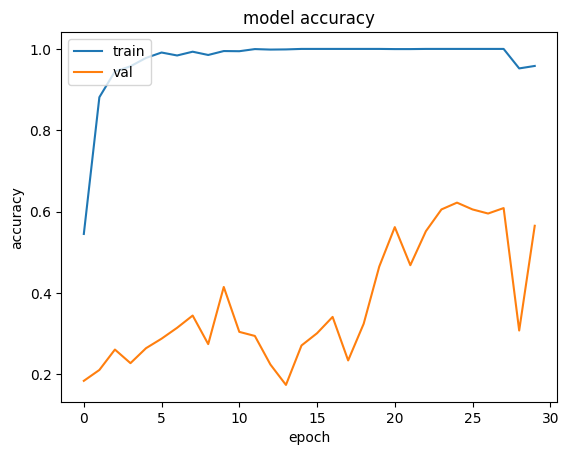

In [20]:
from matplotlib import pyplot as plt
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

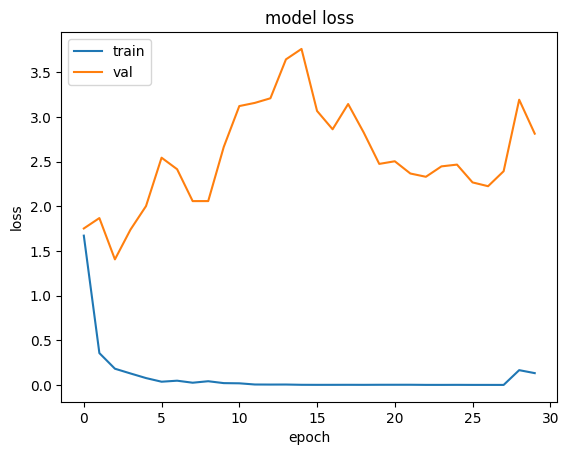

In [21]:
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()